In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Loading the Data

In [7]:
import pandas as pd

data = pd.read_excel('https://github.com/flyseddy/Binary-Classification-of-Spotify-Songs-using-Audio-Analysis-Features/blob/main/data.xlsx?raw=true') # Reads in the dataset

In [8]:
data_copy = data.copy()



---
Exploratory Data Analysis


In [9]:
data_copy.head()

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,liked
0,6oIahjoSHQ3GQJg0hrLdzY,I Believed It (feat. Mac Miller),"dvsn, Ty Dolla $ign, Mac Miller",0.524,0.699,1,-5.559,0,0.0462,0.3030,0.000000,0.7690,0.703,145.191,4.110167,4,1
1,2u93OtblDZphLnmRFjBeeg,Color of Autumn,Nujabes,0.701,0.602,1,-12.291,0,0.0557,0.6350,0.904000,0.0729,0.737,80.029,1.730217,4,1
2,3HfJucp1eH2WZYn9fdDE74,c l o s e,J. Cole,0.724,0.912,9,-5.628,1,0.4040,0.3130,0.000000,0.0921,0.477,89.971,2.812717,4,1
3,73aofsDvxQznhWLfgQ5gBz,Grew Apart,"Logan Mize, Donovan Woods",0.624,0.640,7,-7.735,1,0.0806,0.0529,0.000028,0.1190,0.592,88.942,2.832933,4,0
4,07Jhq6iNvTWXFShXK3kXHy,All I Know About Girls,Old Dominion,0.683,0.500,4,-8.331,1,0.0275,0.5960,0.000000,0.1040,0.928,140.056,2.715333,4,0


In [10]:
data_copy.keys()

Index(['id', 'name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min', 'time_signature', 'liked'],
      dtype='object')

In [11]:
data_copy.dtypes

id                   object
name                 object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_min        float64
time_signature        int64
liked                 int64
dtype: object

In [12]:
data_copy.isnull().sum() # No null values

id                  0
name                0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_min        0
time_signature      0
liked               0
dtype: int64

In [13]:
# Checks for class imbalance
data_copy['liked'].value_counts()

1    500
0    500
Name: liked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Variable')

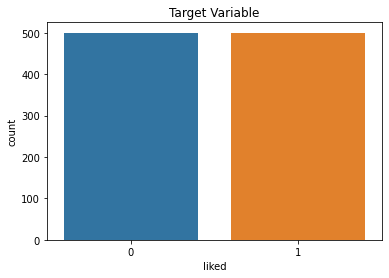

In [14]:
sns.countplot(data_copy['liked'])
plt.title("Target Variable")

In [15]:
num_var = data_copy.select_dtypes(include=np.number)
num_var.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,liked
0,0.524,0.699,1,-5.559,0,0.0462,0.3030,0.000000,0.7690,0.703,145.191,4.110167,4,1
1,0.701,0.602,1,-12.291,0,0.0557,0.6350,0.904000,0.0729,0.737,80.029,1.730217,4,1
2,0.724,0.912,9,-5.628,1,0.4040,0.3130,0.000000,0.0921,0.477,89.971,2.812717,4,1
3,0.624,0.640,7,-7.735,1,0.0806,0.0529,0.000028,0.1190,0.592,88.942,2.832933,4,0
4,0.683,0.500,4,-8.331,1,0.0275,0.5960,0.000000,0.1040,0.928,140.056,2.715333,4,0


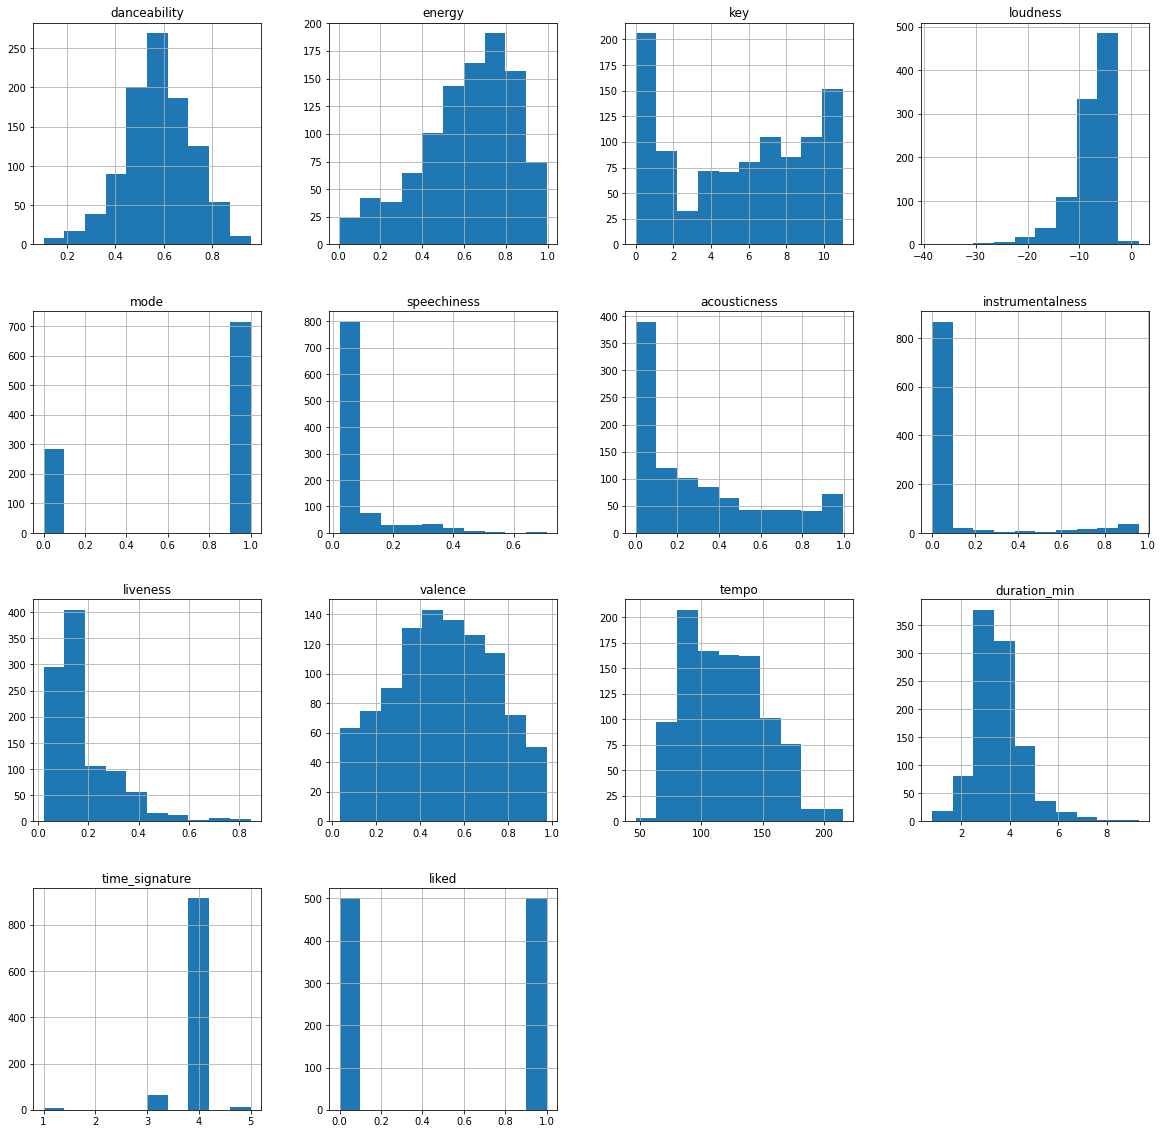

In [16]:
data_copy.hist(figsize=(20,20))
plt.show()

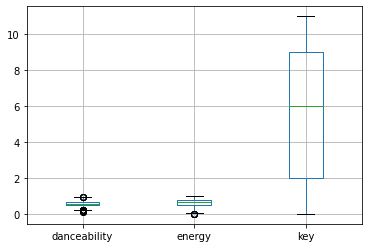

In [17]:
data_copy[['danceability', 'energy', 'key']].boxplot()
plt.show() # Key is the  only one without outliers

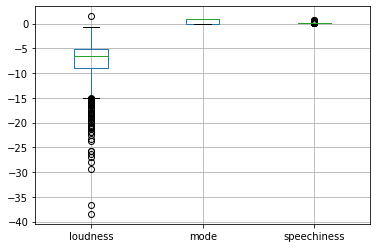

In [18]:
data_copy[['loudness', 'mode', 'speechiness']].boxplot()
plt.show() # Mode is the only one without outliers

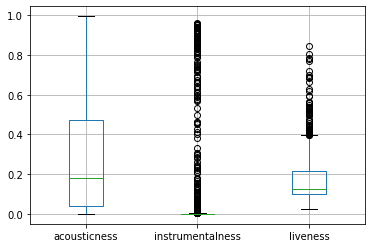

In [19]:
data_copy[['acousticness', 'instrumentalness', 'liveness']].boxplot()
plt.show() # Acousticness is the only one without outliers

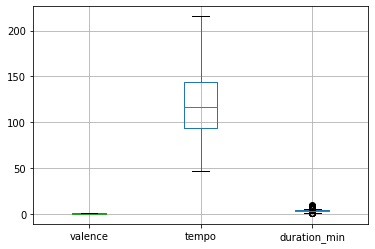

In [20]:
data_copy[['valence', 'tempo', 'duration_min']].boxplot()
plt.show() # Valence and tempo are the only ones without outliers

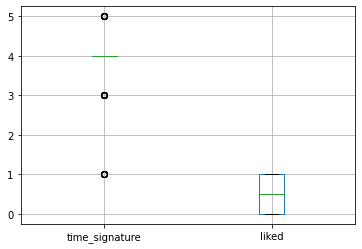

In [21]:
data_copy[['time_signature', 'liked']].boxplot()
plt.show() # Time signature has a few outliers

In [22]:
data_copy.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,liked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.577036,0.617567,5.455000,-7.721358,0.716000,0.082626,0.297192,0.086179,0.177334,0.503260,119.689760,3.540062,3.923000,0.50000
std,0.139393,0.222925,3.583967,4.157798,0.451162,0.098712,0.302894,0.238015,0.125589,0.232289,31.490101,1.024932,0.391439,0.50025
min,0.104000,0.004900,0.000000,-38.462000,0.000000,0.023200,0.000006,0.000000,0.022600,0.033800,46.572000,0.790517,1.000000,0.00000
25%,0.498000,0.484250,2.000000,-9.087750,0.000000,0.033400,0.042100,0.000000,0.099575,0.333750,93.422750,2.939996,4.000000,0.00000
50%,0.577500,0.653000,6.000000,-6.572500,1.000000,0.043200,0.183000,0.000003,0.126000,0.503000,116.945500,3.396558,4.000000,0.50000
75%,0.668250,0.790000,9.000000,-5.087750,1.000000,0.073475,0.473250,0.001475,0.218250,0.681250,143.834000,4.003275,4.000000,1.00000
max,0.957000,0.996000,11.000000,1.467000,1.000000,0.710000,0.995000,0.959000,0.845000,0.977000,215.449000,9.316217,5.000000,1.00000


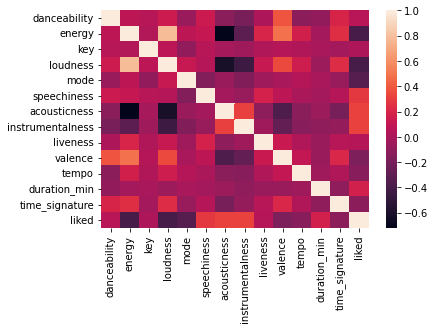

In [23]:
# Correlation plot heatmap
sns.heatmap(data_copy.corr())

In [24]:
data_copy.keys()[3:]

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'time_signature', 'liked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

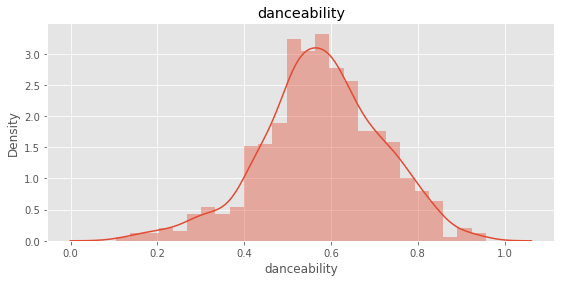

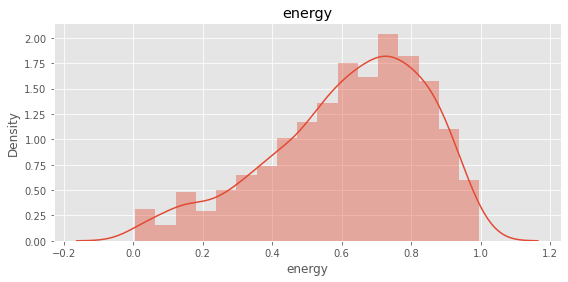

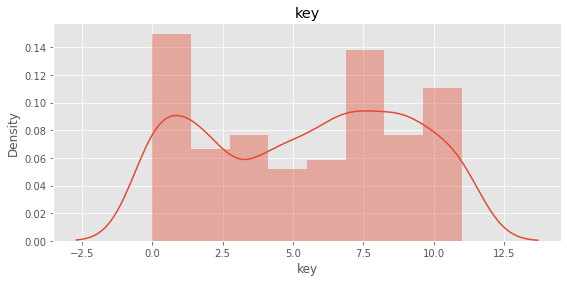

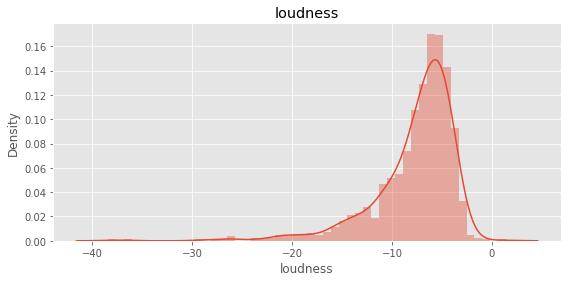

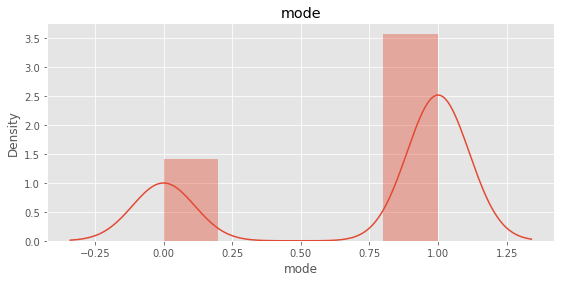

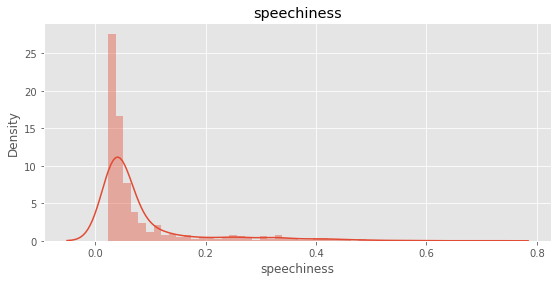

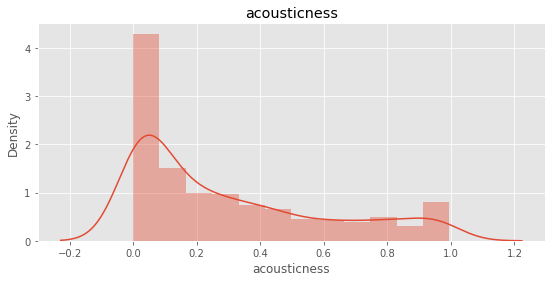

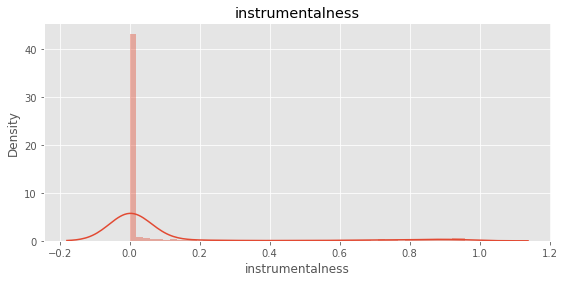

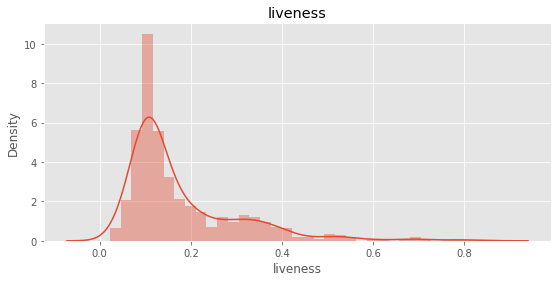

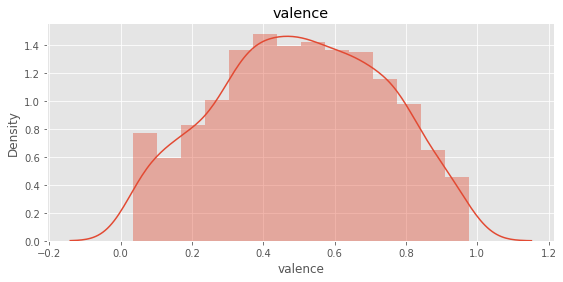

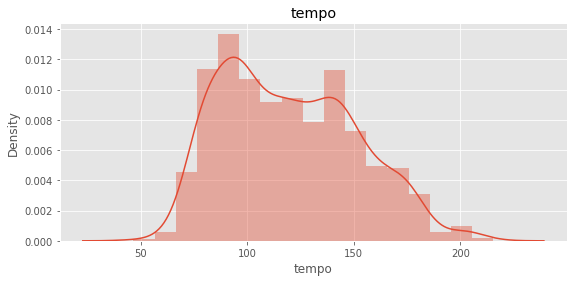

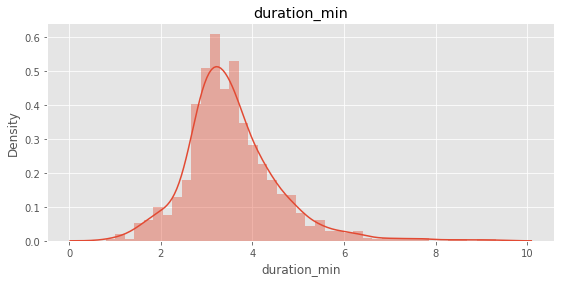

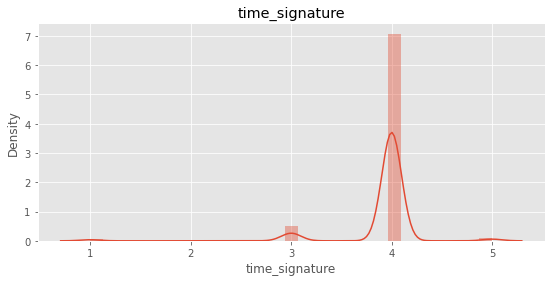

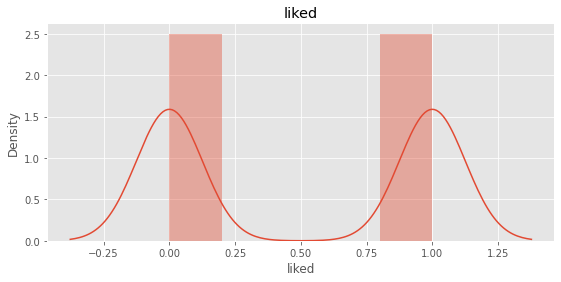

In [25]:
plt.style.use("ggplot")
for column in data_copy.keys()[3:]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data_copy[column], kde=True)
    plt.title(column)

In [26]:
data_new = data_copy.iloc[:, 3:]

In [27]:
data_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,liked
0,0.524,0.699,1,-5.559,0,0.0462,0.3030,0.000000,0.7690,0.703,145.191,4.110167,4,1
1,0.701,0.602,1,-12.291,0,0.0557,0.6350,0.904000,0.0729,0.737,80.029,1.730217,4,1
2,0.724,0.912,9,-5.628,1,0.4040,0.3130,0.000000,0.0921,0.477,89.971,2.812717,4,1
3,0.624,0.640,7,-7.735,1,0.0806,0.0529,0.000028,0.1190,0.592,88.942,2.832933,4,0
4,0.683,0.500,4,-8.331,1,0.0275,0.5960,0.000000,0.1040,0.928,140.056,2.715333,4,0


In [28]:
data_new.corr()["liked"].abs().sort_values(ascending=False)

liked               1.000000
loudness            0.404019
energy              0.397181
mode                0.332641
instrumentalness    0.322798
acousticness        0.321613
speechiness         0.283117
duration_min        0.177620
valence             0.169703
tempo               0.131514
time_signature      0.120130
danceability        0.060449
liveness            0.048751
key                 0.014237
Name: liked, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


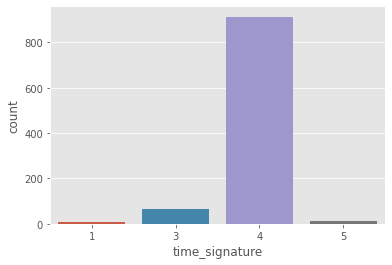

In [29]:
# Time signature is only categorical varibale besides Target
sns.countplot(data_new['time_signature'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


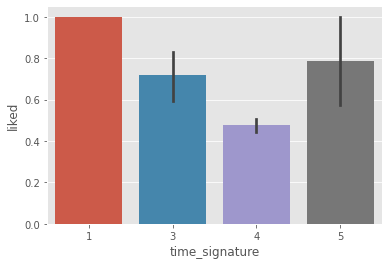

In [30]:
sns.barplot(data_new['time_signature'], data_new['liked'])

In [31]:
data_new.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,liked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.577036,0.617567,5.455000,-7.721358,0.716000,0.082626,0.297192,0.086179,0.177334,0.503260,119.689760,3.540062,3.923000,0.50000
std,0.139393,0.222925,3.583967,4.157798,0.451162,0.098712,0.302894,0.238015,0.125589,0.232289,31.490101,1.024932,0.391439,0.50025
min,0.104000,0.004900,0.000000,-38.462000,0.000000,0.023200,0.000006,0.000000,0.022600,0.033800,46.572000,0.790517,1.000000,0.00000
25%,0.498000,0.484250,2.000000,-9.087750,0.000000,0.033400,0.042100,0.000000,0.099575,0.333750,93.422750,2.939996,4.000000,0.00000
50%,0.577500,0.653000,6.000000,-6.572500,1.000000,0.043200,0.183000,0.000003,0.126000,0.503000,116.945500,3.396558,4.000000,0.50000
75%,0.668250,0.790000,9.000000,-5.087750,1.000000,0.073475,0.473250,0.001475,0.218250,0.681250,143.834000,4.003275,4.000000,1.00000
max,0.957000,0.996000,11.000000,1.467000,1.000000,0.710000,0.995000,0.959000,0.845000,0.977000,215.449000,9.316217,5.000000,1.00000


In [32]:
data_new

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,liked
0,0.524,0.699,1,-5.559,0,0.0462,0.30300,0.000000,0.7690,0.703,145.191,4.110167,4,1
1,0.701,0.602,1,-12.291,0,0.0557,0.63500,0.904000,0.0729,0.737,80.029,1.730217,4,1
2,0.724,0.912,9,-5.628,1,0.4040,0.31300,0.000000,0.0921,0.477,89.971,2.812717,4,1
3,0.624,0.640,7,-7.735,1,0.0806,0.05290,0.000028,0.1190,0.592,88.942,2.832933,4,0
4,0.683,0.500,4,-8.331,1,0.0275,0.59600,0.000000,0.1040,0.928,140.056,2.715333,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.526,0.439,7,-11.204,1,0.0365,0.31400,0.811000,0.6310,0.305,149.865,3.159550,4,1
996,0.228,0.224,7,-12.749,1,0.0311,0.94600,0.000222,0.2730,0.180,60.300,3.561883,4,0
997,0.769,0.922,2,-7.479,1,0.1190,0.14800,0.000197,0.5000,0.723,113.621,6.395117,4,1
998,0.813,0.687,5,-5.906,0,0.0510,0.00612,0.000000,0.4120,0.782,117.014,3.783333,4,1


In [33]:
data_copy

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,liked
0,6oIahjoSHQ3GQJg0hrLdzY,I Believed It (feat. Mac Miller),"dvsn, Ty Dolla $ign, Mac Miller",0.524,0.699,1,-5.559,0,0.0462,0.30300,0.000000,0.7690,0.703,145.191,4.110167,4,1
1,2u93OtblDZphLnmRFjBeeg,Color of Autumn,Nujabes,0.701,0.602,1,-12.291,0,0.0557,0.63500,0.904000,0.0729,0.737,80.029,1.730217,4,1
2,3HfJucp1eH2WZYn9fdDE74,c l o s e,J. Cole,0.724,0.912,9,-5.628,1,0.4040,0.31300,0.000000,0.0921,0.477,89.971,2.812717,4,1
3,73aofsDvxQznhWLfgQ5gBz,Grew Apart,"Logan Mize, Donovan Woods",0.624,0.640,7,-7.735,1,0.0806,0.05290,0.000028,0.1190,0.592,88.942,2.832933,4,0
4,07Jhq6iNvTWXFShXK3kXHy,All I Know About Girls,Old Dominion,0.683,0.500,4,-8.331,1,0.0275,0.59600,0.000000,0.1040,0.928,140.056,2.715333,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2RBCtGTNxSgk8Db9QBz6Xj,Das zweite Kapitel,Yutaka Yamada,0.526,0.439,7,-11.204,1,0.0365,0.31400,0.811000,0.6310,0.305,149.865,3.159550,4,1
996,2TjnCxxQRYn56Ye8gkUKiW,Desperado - 2013 Remaster,Eagles,0.228,0.224,7,-12.749,1,0.0311,0.94600,0.000222,0.2730,0.180,60.300,3.561883,4,0
997,52bz3fOCyr6GgkJQsLK9PM,Square Biz,Teena Marie,0.769,0.922,2,-7.479,1,0.1190,0.14800,0.000197,0.5000,0.723,113.621,6.395117,4,1
998,5nmx8E47mLiOuwLWjKrSqt,I Can't Describe (The Way I Feel) (feat. T.I.),"Jennifer Hudson, T.I.",0.813,0.687,5,-5.906,0,0.0510,0.00612,0.000000,0.4120,0.782,117.014,3.783333,4,1


In [34]:
X, y = data_copy.iloc[:, :-1], data_copy.iloc[:, [-1]]

In [35]:
X.head()

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature
0,6oIahjoSHQ3GQJg0hrLdzY,I Believed It (feat. Mac Miller),"dvsn, Ty Dolla $ign, Mac Miller",0.524,0.699,1,-5.559,0,0.0462,0.3030,0.000000,0.7690,0.703,145.191,4.110167,4
1,2u93OtblDZphLnmRFjBeeg,Color of Autumn,Nujabes,0.701,0.602,1,-12.291,0,0.0557,0.6350,0.904000,0.0729,0.737,80.029,1.730217,4
2,3HfJucp1eH2WZYn9fdDE74,c l o s e,J. Cole,0.724,0.912,9,-5.628,1,0.4040,0.3130,0.000000,0.0921,0.477,89.971,2.812717,4
3,73aofsDvxQznhWLfgQ5gBz,Grew Apart,"Logan Mize, Donovan Woods",0.624,0.640,7,-7.735,1,0.0806,0.0529,0.000028,0.1190,0.592,88.942,2.832933,4
4,07Jhq6iNvTWXFShXK3kXHy,All I Know About Girls,Old Dominion,0.683,0.500,4,-8.331,1,0.0275,0.5960,0.000000,0.1040,0.928,140.056,2.715333,4


In [36]:
y.head()

,liked
0,1
1,1
2,1
3,0
4,0


In [37]:
X.shape

(1000, 16)

In [38]:
y.shape

(1000, 1)



---


Model Selection

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_test_copy = X_test[:]

In [41]:
X_test = X_test.iloc[:, 3:]

In [42]:
X_train = X_train.iloc[:, 3:]

In [43]:
# Separate Numerical and Categorical Variables
num_attribs = list(X_train)
num_attribs.remove('key')
num_attribs.remove('mode')
num_attribs.remove('time_signature')

cat_attribs = ['key','mode', 'time_signature']

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# Create Pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

X_train_transformed = full_pipeline.fit_transform(X_train)

Logistic Regression

In [45]:
# Model Selection and Training
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_transformed, y_train.values.ravel())

LogisticRegression(random_state=42)

In [46]:
log_reg_predictions = log_reg.predict(X_train_transformed)

In [47]:
from sklearn.metrics import accuracy_score

log_reg_accuracy = accuracy_score(y_train, log_reg_predictions)
print(f"Accuracy of Logistic Regression on Training Set: {log_reg_accuracy*100}%")

Accuracy of Logistic Regression on Training Set: 84.125%


Support Vector Machine

In [48]:
from sklearn import svm

svm_model = svm.SVC(random_state=42)

svm_model.fit(X_train_transformed, y_train.values.ravel())

SVC(random_state=42)

In [49]:
svm_predictions = svm_model.predict(X_train_transformed)

In [50]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_train, svm_predictions)
print(f"Accuracy of Support Vector Machine on Training Set: {svm_accuracy*100}%")

Accuracy of Support Vector Machine on Training Set: 88.75%


K-Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_transformed, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [52]:
neigh_predictions = neigh.predict(X_train_transformed)

In [53]:
neigh_accuracy = accuracy_score(y_train, neigh_predictions)
print(f"Accuracy of Nearest Neighbors Classifier on Training Set: {neigh_accuracy*100}%")

Accuracy of Nearest Neighbors Classifier on Training Set: 88.25%


Decision Tree Classifier

In [54]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_transformed, y_train.values.ravel())

DecisionTreeClassifier(random_state=42)

In [55]:
tree_model_predictions = tree_model.predict(X_train_transformed)

In [56]:
tree_accuracy = accuracy_score(y_train, tree_model_predictions)
print(f"Accuracy of Decision Tree on Training Set: {tree_accuracy*100}%")

Accuracy of Decision Tree on Training Set: 99.875%


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model, X_train_transformed, y_train.values.ravel(), scoring='accuracy', cv=10)

In [58]:
def display_scores(scores):
  print("Scores: ", scores)
  print(f"Mean: ", scores.mean())
  print("Standard Deviation: ", scores.std())

In [59]:
display_scores(scores)

Scores:  [0.8375 0.725  0.8    0.825  0.775  0.7    0.75   0.75   0.7875 0.7   ]
Mean:  0.7649999999999999
Standard Deviation:  0.04602988159880494


Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_transformed, y_train.values.ravel())

GaussianNB()

In [61]:
gnb_predictions = gnb.predict(X_train_transformed)

In [62]:
gnb_accuracy = accuracy_score(y_train, gnb_predictions)
print(f"Accuracy of Naive Bayes on Training Set: {gnb_accuracy*100}%")

Accuracy of Naive Bayes on Training Set: 69.375%


Gradient Boosted Tree

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

boosted_tree = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
boosted_tree.fit(X_train_transformed, y_train.values.ravel())

boosted_predictions = boosted_tree.predict(X_train_transformed)

boosted_accuracy = accuracy_score(y_train, boosted_predictions)
print(f"Accuracy of Gradient Boosted Tree on Training Set: {boosted_accuracy*100}%")

Accuracy of Gradient Boosted Tree on Training Set: 92.75%


In [64]:
# Cross validation
scores = cross_val_score(boosted_tree, X_train_transformed, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores)

Scores:  [0.8125 0.8125 0.7875 0.8875 0.825  0.8125 0.775  0.8875 0.825  0.775 ]
Mean:  0.82
Standard Deviation:  0.03799671038392664




---



Cross Validation for the other Models

Logistic Regression

In [65]:
log_reg_scores = cross_val_score(log_reg, X_train_transformed, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(log_reg_scores)

Scores:  [0.8125 0.8625 0.8375 0.8125 0.8375 0.775  0.725  0.9    0.875  0.7875]
Mean:  0.8225
Standard Deviation:  0.04898979485566358


Support Vector Machine

In [66]:
svm_scores = cross_val_score(svm_model, X_train_transformed, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(svm_scores)

Scores:  [0.85   0.8125 0.8375 0.8375 0.875  0.8    0.8    0.9375 0.8625 0.8   ]
Mean:  0.8412499999999999
Standard Deviation:  0.041098205556933984


KNearestNeighbors

In [67]:
neigh_scores = cross_val_score(neigh, X_train_transformed, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(neigh_scores)

Scores:  [0.825  0.7875 0.7    0.8375 0.75   0.7625 0.8    0.8875 0.7375 0.8   ]
Mean:  0.78875
Standard Deviation:  0.051371806470086295


Naive Bayes

In [68]:
gnb_scores = cross_val_score(gnb, X_train_transformed, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(gnb_scores)

Scores:  [0.6625 0.6375 0.725  0.7375 0.65   0.6625 0.625  0.8125 0.6875 0.675 ]
Mean:  0.6874999999999999
Standard Deviation:  0.05361902647381805


Our best model is a Support Vector Machine, so let's start with that!

Hyperparameter Tuning

In [69]:
svm_model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C':[0.1, 1, 10, 100, 1000],
     'gamma': [1, 0.1, 0.01, 0.0001],
     'kernel': ['rbf']},
]

grid_search = GridSearchCV(svm.SVC(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train_transformed, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [71]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [72]:
grid_search.best_estimator_

SVC(C=1, gamma=0.1, random_state=42)

Evaluation Scores using GridSearch

In [73]:
grid_results = grid_search.cv_results_
for score, params in zip(grid_results['mean_test_score'], grid_results['params']):
  print(score, params)

0.51125 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.805 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.7825 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.51125 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7525000000000001 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.8375 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8162500000000001 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.51125 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7637499999999999 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.8099999999999999 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.82 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.7837500000000001 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7637499999999999 {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.77375 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.8174999999999999 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.8125 {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7637499999999999 {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.775 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.7875 {'C': 1000, 'gamma'

In [74]:
final_model_2 = grid_search.best_estimator_

X_test_transformed = full_pipeline.transform(X_test)

final_predictions = final_model_2.predict(X_test_transformed)

final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final Accuracy Score of Support Vector Machine model with HyperParameter Tuning: {final_accuracy*100}%")

Final Accuracy Score of Support Vector Machine model with HyperParameter Tuning: 82.0%


In [75]:
joblib.dump(final_model_2, "Best_Model_SVM_82.pkl")

['Best_Model_SVM_82.pkl']



---



Second GridSearch

In [76]:
param_grid_2 = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators':[3,10], 'max_features':[2, 3, 4]}
]

grid_search_2 = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_2, cv=5, scoring='accuracy', return_train_score=True)

grid_search_2.fit(X_train_transformed, y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'learning_rate': [0.1, 0.01, 0.001],
                          'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [77]:
grid_search_2.best_params_

{'max_features': 8, 'n_estimators': 30}

In [78]:
grid_search_2.best_estimator_

GradientBoostingClassifier(max_features=8, n_estimators=30, random_state=42)

In [79]:
grid_results_2 = grid_search_2.cv_results_
for score, params in zip(grid_results_2['mean_test_score'], grid_results_2['params']):
  print(score, params)

0.765 {'max_features': 2, 'n_estimators': 3}
0.7637499999999999 {'max_features': 2, 'n_estimators': 10}
0.79125 {'max_features': 2, 'n_estimators': 30}
0.8012499999999999 {'max_features': 4, 'n_estimators': 3}
0.805 {'max_features': 4, 'n_estimators': 10}
0.8275 {'max_features': 4, 'n_estimators': 30}
0.8037500000000002 {'max_features': 6, 'n_estimators': 3}
0.81875 {'max_features': 6, 'n_estimators': 10}
0.8275 {'max_features': 6, 'n_estimators': 30}
0.8099999999999999 {'max_features': 8, 'n_estimators': 3}
0.8150000000000001 {'max_features': 8, 'n_estimators': 10}
0.8387499999999999 {'max_features': 8, 'n_estimators': 30}
0.765 {'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 3}
0.7637499999999999 {'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 10}
0.70375 {'learning_rate': 0.1, 'max_features': 3, 'n_estimators': 3}
0.80375 {'learning_rate': 0.1, 'max_features': 3, 'n_estimators': 10}
0.8012499999999999 {'learning_rate': 0.1, 'max_features': 4, 'n_estimators': 3}
0

In [80]:
features_importances = grid_search_2.best_estimator_.feature_importances_

In [81]:
features_importances

array([0.03752282, 0.14223597, 0.21093959, 0.18229889, 0.02302465,
       0.13998328, 0.01308348, 0.01661908, 0.00955606, 0.12237538,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00071894, 0.        , 0.        , 0.0018022 ,
       0.00325607, 0.00426294, 0.04552107, 0.04465201, 0.        ,
       0.        , 0.00214757, 0.        ])

In [82]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(features_importances, attributes), reverse=True)

[(0.21093958677686342, 'loudness'),
 (0.1822988930192756, 'speechiness'),
 (0.14223596977373282, 'energy'),
 (0.13998328349470585, 'instrumentalness'),
 (0.12237538438389653, 'duration_min'),
 (0.03752281786927723, 'danceability'),
 (0.023024652616138907, 'acousticness'),
 (0.01661907819112512, 'valence'),
 (0.013083476276591764, 'liveness'),
 (0.009556061952134244, 'tempo'),
 (0.004262940028548185, 11),
 (0.003256069816384236, 10),
 (0.001802195617267216, 9),
 (0.0007189413082945111, 6),
 (0.0, 8),
 (0.0, 7),
 (0.0, 5),
 (0.0, 4),
 (0.0, 3),
 (0.0, 2),
 (0.0, 1),
 (0.0, 0)]

In [83]:
final_model = grid_search_2.best_estimator_

X_test_transformed = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_transformed)

final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final Accuracy Score of Gradient Boosted Tree model with HyperParameter Tuning: {final_accuracy*100}%")

Final Accuracy Score of Gradient Boosted Tree model with HyperParameter Tuning: 77.5%


In [84]:
import joblib

joblib.dump(final_model, 'gradient_boosted_final_model.pkl')

['gradient_boosted_final_model.pkl']



---



In [85]:
# Load Model
my_model = joblib.load('Best_Model_SVM_82.pkl')
predictions = my_model.predict(X_test_transformed)
X_test_copy['Prediction'] = predictions
X_test_copy['Actual'] = y_test

In [86]:
final_prediction = X_test_copy[['name','artist', 'Actual', 'Prediction']]

In [87]:
final_prediction

,name,artist,Actual,Prediction
521,Rock Wit'cha,Bobby Brown,1,1
737,Pilgrimage,Ichiko Aoba,1,1
740,See Me,Rich Brian,1,1
660,Memories,Levox,1,1
411,Old School,Toby Keith,0,0
...,...,...,...,...
408,The Other Side,"SZA, Justin Timberlake",1,1
332,I Called Mama,Tim McGraw,0,0
208,Over the Moon,The MarÃ­as,1,1
613,Life Is Simple in the Moonlight,The Strokes,1,0


In [88]:
pd.set_option('max_rows', 200)

In [89]:
final_prediction

,name,artist,Actual,Prediction
521,Rock Wit'cha,Bobby Brown,1,1
737,Pilgrimage,Ichiko Aoba,1,1
740,See Me,Rich Brian,1,1
660,Memories,Levox,1,1
411,Old School,Toby Keith,0,0
678,Cold As You,Luke Combs,0,0
626,Weatherman,Wild Rivers,0,0
513,The Good Ones,Gabby Barrett,0,0
859,Recent Thoughts (Remastered),LANO,1,1
136,Battling,Konola,0,1
